In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes, load_digits
from sklearn.preprocessing import PolynomialFeatures


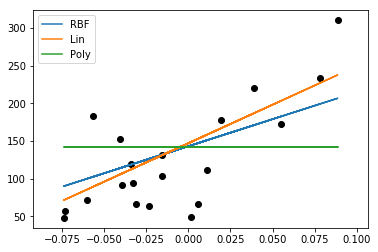

Mean squared error linear: 2310.87
Mean absolute error linear: 37.91
Mean squared error RBF: 2614.96
Mean absolute error RBF: 42.50
Mean squared error Polynomial(2): 5065.25
Mean absolute error Polynomial(2): 61.15
RBF errors:  [ 34.13032549 -23.62656487 -39.95013644  38.14577947   1.51128942
 -80.08455992 103.40870212 -25.26122077  80.72710069 -54.80631787
  -9.64523952 -27.95759184 -94.99221021 -62.21490694 -41.92885546
  20.8647777  -27.62452083   0.37547917  48.94890176 -33.70003469]
Linear errors:  [  6.49995804 -15.60000487 -47.30002086  46.49999547   7.89999343
 -85.80001916  72.49995463 -19.20000691  94.00000058 -49.40000759
 -30.40003482 -13.6999984  -99.4000178  -59.10000997 -23.39999398
  10.89997641 -26.80001236   1.19998764  33.09997029 -15.49999432]
Poly errors:  [ 91.5 -50.5 -30.5  10.5 -21.5 -74.5 168.5 -47.5  41.5 -75.5  31.5 -69.5
 -92.5 -77.5 -93.5  36.5 -37.5  -9.5  78.5 -84.5]


/home/fiona/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


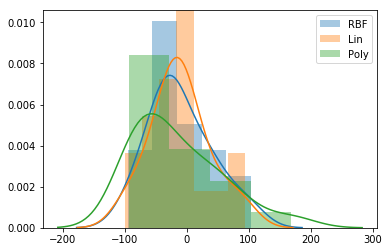

In [11]:
#http://scikit-learn.org/stable/datasets/index.html

df = load_diabetes()

df_X = df.data[:, np.newaxis, 2]

df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

df_y_train = df.target[:-20]
df_y_test = df.target[-20:]

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=10)
y_rbf = svr_rbf.fit(df_X_train, df_y_train).predict(df_X_test)
y_lin = svr_lin.fit(df_X_train, df_y_train).predict(df_X_test)
y_poly = svr_poly.fit(df_X_train, df_y_train).predict(df_X_test)

plt.figure()
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, y_rbf, label='RBF')
plt.plot(df_X_test, y_lin, label='Lin')
plt.plot(df_X_test, y_poly, label='Poly')
plt.legend()
#plt.savefig("MSE,MAE.png", bbox_inches='tight')
plt.show()

print("Mean squared error linear: %.2f" %mean_squared_error(df_y_test, y_lin))
print("Mean absolute error linear: %.2f" %mean_absolute_error(df_y_test, y_lin))
print("Mean squared error RBF: %.2f" %mean_squared_error(df_y_test, y_rbf))
print("Mean absolute error RBF: %.2f" %mean_absolute_error(df_y_test, y_rbf))
print("Mean squared error Polynomial(2): %.2f" %mean_squared_error(df_y_test, y_poly))
print("Mean absolute error Polynomial(2): %.2f" %mean_absolute_error(df_y_test, y_poly))

rbf_errors = df_y_test-y_rbf
lin_errors = df_y_test-y_lin
poly_errors = df_y_test-y_poly
print("RBF errors: ", rbf_errors)
print("Linear errors: ", lin_errors)
print("Poly errors: ", poly_errors)


sb.distplot(rbf_errors, label='RBF')
sb.distplot(lin_errors, label='Lin')
sb.distplot(poly_errors, label='Poly')
plt.legend()